In [1]:
import random
import time
import matplotlib.pyplot as plt
import copy
import sys
import multiprocessing as mp

In [2]:
sys.setrecursionlimit(10000)

# Fonctions Utiles

Les deux fonctions données plus bas sont utiles pour tester si un tableau ou un ensemble de tableaux sont bien
triés par ordre ascendant.


In [3]:
def isSorted(l):
    for i in range(len(l) - 1):
        if l[i] > l[i + 1]: return False
    return True

def areSorted(ll):
    for i in range(len(ll)):
        if not isSorted(ll[i]): return (False, i)
    return (True, 0)

# Création des tableaux

La fonction __create\_data__ permet de créer des listes qui contiennent les tableaux à trier avec des tailles
croissantes. Les paramètres par défaut sont 15 tableaux, et des tailles de tableaux qui augmentent  par incrément de 200. Par défaut, le plus petit tableau aura 200 éléments, le plus grand aura 3000 éléments.

In [4]:
def create_data(nlist=15, nval=200):
    
    # Création de listes de taille incrémentale et de contenu aléatoire
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    sizeArrays = []
    
    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i 
        dataRandom = s*[0]
        dataSorted = s*[0]
        dataInversed = s*[0]
        for j in range(s):
            dataRandom[j]=j
            dataSorted[j]=j
            dataInversed[j]=j
            
        dataInversed.reverse()
        random.shuffle(dataRandom)
        
        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        sizeArrays.append(s)

    return(sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted)


# Tri des tableaux

La fonction **executerTri** prend en entrée :

- la fonction qui va effectuer le tri **fct_tri**
- la couleur des tracés **color**
- le nom de l'algorithme de tri **nom**
- le nombre de tableaux **nlist** (utilisé par **create_data**)
- le nombre de valeurs dans le premier tableau **nval**  (utilisé par **create_data**)
- un booléen qui indique si le tableau est trié **surplace** ou si le tableau trié est renvoyé comme résultat de la fonction de tri



In [5]:
def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace = True):
    
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)
    
    toplotRandom = []
    toplotSorted = []
    toplotInverted = []
    
    dataTestRandom    = copy.deepcopy(listDataRandom)
    dataTestSorted    = copy.deepcopy(listDataSorted)
    dataTestInverted  = copy.deepcopy(listDataInvertedSorted)
    
    for i in range(len(axis)):
        time1 = time.perf_counter()
        if surplace:
            fct_tri(dataTestRandom[i])
        else:
            dataTestRandom[i] = fct_tri(dataTestRandom[i])
        time2 = time.perf_counter()
        toplotRandom.append(time2 - time1)
        time3 = time.perf_counter()
        if surplace:
            fct_tri(dataTestSorted[i])
        else:
            dataTestSorted[i] = fct_tri(dataTestSorted[i])
        time4 = time.perf_counter()
        toplotSorted.append(time4 - time3)
        time5 = time.perf_counter()
        if surplace:
            fct_tri(dataTestInverted[i])
        else:
            dataTestInverted[i] = fct_tri(dataTestInverted[i])
        time6 = time.perf_counter()
        toplotInverted.append(time6 - time5)

    (ok1, ipb1) = areSorted(dataTestRandom)
    (ok2, ipb2) = areSorted(dataTestSorted)
    (ok3, ipb3) = areSorted(dataTestInverted)
    
    if not ok1:
        print(nom + ' data random incorrect, liste #' + str(ipb1))
    else:
        plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    if not ok2:
        print(nom + ' data Sorted incorrect, liste #' + str(ipb2))
    else:
        plt.plot(axis, toplotSorted, '--' + color, label=nom + ' (Sorted)')

    if not ok3:
        print(nom + ' data Inverted incorrect, liste #' + str(ipb3))
    else:
        plt.plot(axis, toplotInverted, ':' + color, label=nom + ' (Inverted)')
        plt.legend()


# Algorithmes de tri

Ici, nous étudierons la complexité **temporelle** de chaque algorithme de trois manières différentes.
* Valeur connue et établie récupérée par des sources qui seront citées
* Estimation théorique, calculée à la main et comparée à la valeur connue
* Vérification empirique (en bas du notebook) en comparant le temps d'exécution avec les deux valeurs précédentes.

Nous donnerons également une explication concise concernant la complexité **spatiale**.

## Bubble sort

In [6]:
tempsF = 0

def bubble_sort(A):
    global tempsF
    temps1 = time.perf_counter() 
    n = len(A) # +1 affectation
    flag = 1 # +1 affectation
    for i in range(n-1): # +1 affectation +n comparaisons +n-1 boucle
        flag = 0 # +1 affectation
        for j in range(n-1-i): # +1 affectation, +n comparaisons + somme des n-1 entiers
            if A[j] > A[j+1]:            # +1
                A[j], A[j+1] = A[j+1], A[j]  # +1
                flag = 1
        if flag == 0:  # +1
            break
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin
    tempsF = temps2 - temps1  
    return A

# Exemple d'utilisation
sorted_array = bubble_sort([3, 2, 1, 7, 4, 10, 49, 27, 30])
print(f"Sorted array: {sorted_array}")
print(f"Elapsed time (TempsF): {tempsF:.6f} seconds")

# Meilleur cas : tableau déjà trié
best_case_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sorted_best_case = bubble_sort(best_case_array)
print(f"Sorted array: {sorted_best_case}")
print("Meilleur cas :")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

# Pire cas : tableau trié dans l'ordre inverse
worst_case_array = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_worst_case = bubble_sort(worst_case_array)
print("Pire cas :")
print(f"Elapsed time: {tempsF:.10f} seconds")

Sorted array: [1, 2, 3, 4, 7, 10, 27, 30, 49]
Elapsed time (TempsF): 0.000003 seconds
Sorted array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Meilleur cas :
Elapsed time: 0.0000012920 seconds

Pire cas :
Elapsed time: 0.0000028750 seconds


## Optimized Bubble sort

In [7]:
tempsF = 0  # Variable globale pour stocker le temps d'exécution

def optimized_bubble_sort(A):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début avec haute précision
    n = len(A)
    while True:
        swapped = False
        for i in range(1, n):
            if A[i - 1] > A[i]:
                A[i - 1], A[i] = A[i], A[i - 1]
                swapped = True
        if not swapped:
            break
        n -= 1
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin avec haute précision
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return A

# Meilleur cas : tableau déjà trié
best_case_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sorted_best_case = optimized_bubble_sort(best_case_array)
print(f"Sorted array: {sorted_best_case}")
print("Meilleur cas :")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

# Pire cas : tableau trié dans l'ordre inverse
worst_case_array = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_worst_case = optimized_bubble_sort(worst_case_array)
print("Pire cas :")
print(f"Elapsed time: {tempsF:.10f} seconds")

Sorted array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Meilleur cas :
Elapsed time: 0.0000011250 seconds

Pire cas :
Elapsed time: 0.0000039580 seconds


## Doubly Optimized Bubble sort

In [8]:
tempsF = 0

def doubly_optimized_bubble_sort(A):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début avec haute précision
    n = len(A)  # Obtenir la longueur du tableau
    while True:
        newn = 0  # Initialiser newn pour suivre la dernière position de swap
        swapped = False  # Initialiser le drapeau swapped à False
        # Parcourir le tableau jusqu'au n-ième élément non trié
        for i in range(1, n):  # Boucler du premier au dernier élément de la portion non triée
            if A[i - 1] > A[i]:  # Si l'élément actuel est plus grand que le suivant
                A[i - 1], A[i] = A[i], A[i - 1]  # Les échanger
                swapped = True  # Marquer swapped à True car un échange a eu lieu
                newn = i  # Mettre à jour newn avec l'index actuel
        # Si aucun élément n'a été échangé, le tableau est trié
        if not swapped:
            break  # Sortir de la boucle si aucun échange n'a eu lieu
        n = newn  # Réduire la taille effective du tableau à newn
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin
    tempsF = temps2 - temps1  
    return A  # Retourner le tableau trié

# Meilleur cas : tableau déjà trié
best_case_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sorted_best_case = doubly_optimized_bubble_sort(best_case_array)
print(f"Sorted array: {sorted_best_case}")
print("Meilleur cas :")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

# Pire cas : tableau trié dans l'ordre inverse
worst_case_array = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_worst_case = doubly_optimized_bubble_sort(worst_case_array)
print("Pire cas :")
print(f"Elapsed time: {tempsF:.10f} seconds")

Sorted array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Meilleur cas :
Elapsed time: 0.0000010410 seconds

Pire cas :
Elapsed time: 0.0000035000 seconds


### Étude de la complexité temporelle
#### Bubble sort

* Valeur connue : $O(n^{2})$ (source : *Wikipedia*)
* Calcul théorique :
  
$
\sum_{i=0}^{n-1} \sum_{i=0}^{n-i-1} 1 = \sum_{i=0}^{n-1} n-i-1 = \sum_{i=0}^{n-1} n - 1 - \sum_{i=0}^{n-1} i = n(n-1) - \frac {n(n-1)}{2} 
= \frac {2n(n-1) - n(n-1)}{2} = \frac {n(n-1)}{2} = O(n^2)
$
*  **Dans le pire des cas**, nous avons deux boucles qui parcourent un tableau de taille $n$, donc on a bien une complexité de  $O(n^{2})$.
  Le pire cas serait un tableau trié à l'envers.

*  **Dans le meilleur des cas**, nous savons grâce au flag qui interrompt le programme si aucune permutation n'a été effectuée, que le tableau est déjà trié. Dans ce cas, nous avons une complexité inférieure à $O(n)$ car on ne le parcours qu'une seule fois.


#### Optimized Bubble Sort

* L'analyse est la même que pour le Bubble Sort, peut-être seulement quelques itérations en moins (en décrémentant n) pour le **pire des cas**.
  
#### Doubly optimized Bubble Sort

* Idem pour cet algorithme, on reste sur des complexités de $O(n^2)$ dans le **pire des cas** et $O(n)$ pour **le meilleur des cas**. Celui-ci reste meilleur que les deux précédents dans le cas moyen car il ne parcourt qu'une version plus petite de la liste car il s'arrête à *newn*, en se concentrant sur la partie non triée de la liste.

### Étude de la complexité spatiale

Pour l'ensemble des tris à bulle, nous restons sur une complexité spatiale de $O(1)$ car au maximum quelques variables sont utilisées, mais qu'elles restent à un nombre constant. 

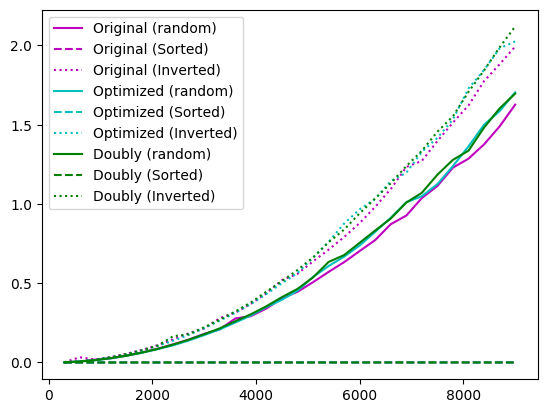

In [ ]:
executerTri(bubble_sort, 'm', 'Original', 30, 300)
executerTri(optimized_bubble_sort, 'c', 'Optimized', 30, 300)
executerTri(doubly_optimized_bubble_sort, 'g', 'Doubly', 30, 300)

Pour le **meilleur cas**, les trois algorithmes prennent le même temps comme prévu.

Pour les deux autres cas, il ne semble pas y avoir de grande différence (si on ommet les pics sûrement dûs au hardware utilisé).
L'original semble même fonctionner plus efficacement que les autres.

Finalement, on observe bien les paraboles du $n^2$ ce qui confirme notre analyse et nos sources.

## Insertion sort

In [34]:
tempsF = 0

def insertion_sort(A):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début avec haute précision
    n = len(A)  # +1
    i = 1       # +1
    while i < n: # boucle : somme de 1 à n
        j = i
        while j > 0 and A[j-1] > A[j]: # boucle : somme de 0 à n
            A[j-1], A[j] = A[j], A[j-1]  # Échanger les éléments 
            j -= 1  
        i += 1 
    
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin 
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return A

# Meilleur cas : tableau déjà trié
best_case_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sorted_best_case = insertion_sort(best_case_array)
print(f"Sorted array: {sorted_best_case}")
print("Meilleur cas :")
print(f"Elapsed time : {tempsF:.10f} seconds\n")

# Pire cas : tableau trié dans l'ordre inverse
worst_case_array = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_worst_case = insertion_sort(worst_case_array)
print("Pire cas :")
print(f"Elapsed time : {tempsF:.10f} seconds\n")


Sorted array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Meilleur cas :
Elapsed time : 0.0000038330 seconds

Pire cas :
Elapsed time : 0.0000069590 seconds



## Optimized Insertion sort

In [11]:
tempsF = 0

def optimized_insertion_sort(A):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début avec haute précision
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        while j >= 0 and key < A[j]:  # Corrigé pour vérifier l'indice
            A[j + 1] = A[j]  # Décaler l'élément
            j -= 1
        A[j + 1] = key  # Insérer la clé à sa position correcte
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin 
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return A

# Meilleur cas : tableau déjà trié
best_case_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sorted_best_case = optimized_insertion_sort(best_case_array)
print(f"Sorted array: {sorted_best_case}")
print("Meilleur cas :")
print(f"Elapsed time : {tempsF:.10f} seconds\n")

# Pire cas : tableau trié dans l'ordre inverse
worst_case_array = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_worst_case = optimized_insertion_sort(worst_case_array)
print("Pire cas :")
print(f"Elapsed time : {tempsF:.10f} seconds\n")

Sorted array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Meilleur cas :
Elapsed time : 0.0000016250 seconds

Pire cas :
Elapsed time : 0.0000032090 seconds



### Étude de la complexité temporelle

#### Insertion Sort

* Valeur connue : $O(n^{2})$ (source : *Wikipedia*)
* Calcul théorique :

$
\sum_{i=1}^{n} \sum_{j=0}^{i} 1 = \sum_{i=1}^{n} i+1 = \sum_{i=1}^n i + \sum{i=1}^{n} 1 = \frac {n(n+1)}{2} + n 
= \frac{n(n+1)+ 2n}{2} = \frac{n^2 + 3n}{2} = O(n^2)
$


  **Dans le pire des cas**, c'est à dire un tableau trié dans l'ordre inverse, nous avons deux boucles qui parcourent un tableau de taille $n$, et chaque élément doit être déplacé soit $n\times n$ opérations, donc on a bien une complexité de  $O(n^{2})$.
  

  **Dans le meilleur des cas**,  nous avons une complexité de $O(n)$ car on ne parcours qu'une seule fois un tableau de taille $n$ déjà trié, aucune permutation n'est faite.

#### Optimized insertion sort

* Ici, nous avons toujours les mêmes complexités au niveau asymptotique. Cette version pourrait est plus efficace dans le cas moyen, car au lieu de permuter tous les éléments jusqu'à arriver dans la bonne position (3 affectations) par permutation, on utilise décale les éléments (1 affectation) par "permutation".

### Étude de la complexité spatiale

Pour le tri par insertion, nous sommes toujours sur une complexité constante $O(1)$ dans les deux cas car on ne stocke pas de liste et on effectue directement les opérations dessus. Le nombre de variables est constant puisqu'il n'évolue pas en fonction de la liste.

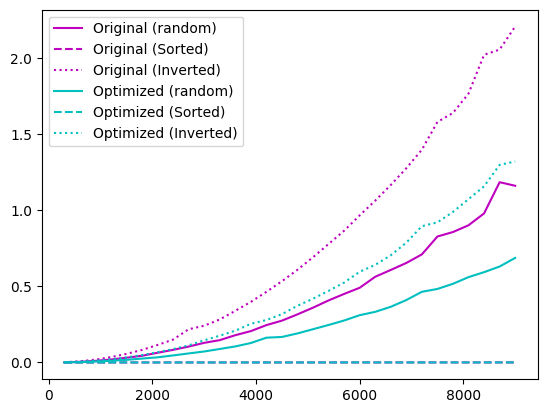

In [33]:
executerTri(insertion_sort, 'm', 'Original', 30, 300)
executerTri(optimized_insertion_sort, 'c', 'Optimized', 30, 300)

Sur des plus grands nombres de listes et d'éléments, on observe tout d'abord que la version optimisée et nettement plus efficace que la version originale, et ce dans tous les cas avec la liste homologue (random avec random, inverted avec inverted...)

De plus, le tri par insertion semble être plus efficace que le tri à bulles, et l'optimisation semble également être plus performante que celles sur le tri à bulles.

## Selection sort

In [12]:
tempsF = 0

def selection_sort(A):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début avec haute précision
    for i in range(len(A)):
        min_ind = i
        for j in range(i + 1, len(A)):
            if A[j] < A[min_ind]:
                min_ind = j
        # Échange des éléments
        A[min_ind], A[i] = A[i], A[min_ind]
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin 
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return A



sorted_array = selection_sort([3, 2, 1, 7, 4, 10, 49, 27, 30])
print(f"Sorted array : {sorted_best_case}")
print(f"Elapsed time : {tempsF:.10f} seconds\n")

Sorted array : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Elapsed time : 0.0000032090 seconds



### Étude de la complexité temporelle

#### Selection sort

* Valeur connue : $O(n^{2})$ (source : *Wikipedia*)
* Calcul théorique :

$
\sum_{i=1}^{n} \sum_{j=i+1}^{n} 1 = \sum_{i=1}^{n} n-i-1 = \sum_{i=1}^{n} n-1 - \sum_{i=1}^{n} i = n(n-1) - \frac {n(n+1)}{2}
= \frac{2n(n-1)-n(n+1)}{2} = \frac{2n^2 - 2n - n^2 - n}{2} = \frac{n^2 - 3n} {2} = O(n^2)
$


  **Dans le pire des cas**, c'est à dire un tableau trié dans l'ordre inverse, nous avons deux boucles qui parcourent un tableau de taille $n$, et chaque élément doit être déplacé soit environ $n\times n$ opérations, donc on a bien une complexité de  $O(n^{2})$.
  

  # à corriger, faux
  **Dans le meilleur des cas**,  nous avons une complexité de $O(n)$ car on ne parcours qu'une seule fois un tableau de taille $n$ déjà trié on n'effectue pas de permutations mais évidemment les comparaisons le sont.

### Étude de la complexité spatiale

Nous restons dans un cas où seul un nombre fixe de variables est utilisé, donc on a encore une fois une complexité spatialle de $O(1)$.

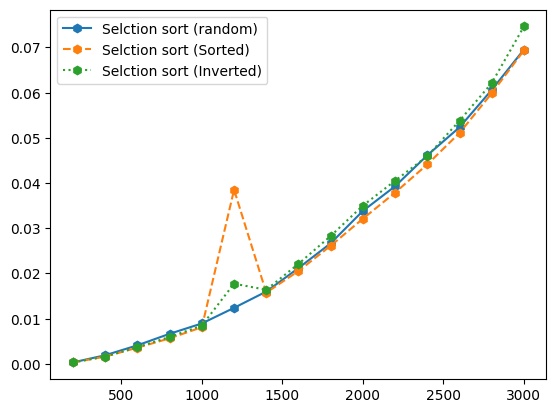

In [67]:
executerTri(selection_sort, 'h', 'Selction sort')

## Heap sort 
**Made by ChatGPT**

In [13]:
tempsF = 0  # Variable globale pour stocker le temps d'exécution

# Function to heapify a subtree rooted at index i
# n is the size of the heap
def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    left = 2 * i + 1  # Left child
    right = 2 * i + 2  # Right child

    # If the left child exists and is greater than the root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # If the right child exists and is greater than the current largest
    if right < n and arr[right] > arr[largest]:
        largest = right

    # If the largest is not the root, swap and continue heapifying
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        # Heapify the affected subtree
        heapify(arr, n, largest)

# Main function to perform heap sort
def heap_sort(arr):
    global tempsF
    temps1 = time.perf_counter()  # Start timing
    n = len(arr)

    # Build a max heap by calling heapify for all non-leaf nodes
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements one by one from the heap
    for i in range(n - 1, 0, -1):
        # Move the current root (largest) to the end
        arr[i], arr[0] = arr[0], arr[i]
        # Call heapify on the reduced heap
        heapify(arr, i, 0)

    temps2 = time.perf_counter()  # End timing
    tempsF = temps2 - temps1  # Calculate elapsed time


case_array = [3, 2, 1, 7, 4, 10, 49, 27, 30]
heap_sort(case_array)
print(f"Sorted array: {case_array}")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

Sorted array: [1, 2, 3, 4, 7, 10, 27, 30, 49]
Elapsed time: 0.0000060420 seconds



## Quick sort (itératif)
**Made by ChatGPT**

In [14]:
tempsF = 0  # Variable globale pour stocker le temps d'exécution

def quick_sort_it(arr):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début avec haute précision
    if len(arr) <= 1:
        return arr
    
    stack = [(0, len(arr) - 1)]

    while stack:
        low, high = stack.pop()

        if low < high:
            pivot_index = partition(arr, low, high)
            
            # Push subarray indices to stack
            stack.append((low, pivot_index - 1))
            stack.append((pivot_index + 1, high))
    
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin 
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return arr

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1


case_array = [3, 2, 1, 7, 4, 10, 49, 27, 30]
sorted_case = quick_sort_it(case_array.copy())  # Utiliser .copy() pour ne pas modifier le tableau d'origine
print(f"Sorted array: {sorted_case}")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

Sorted array: [1, 2, 3, 4, 7, 10, 27, 30, 49]
Elapsed time: 0.0000066670 seconds



## Quick sort (récursif)
**Made by ChatGPT**

In [50]:
tempsF = 0  # Variable globale pour stocker le temps d'exécution

def quick_sort_rec(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort_rec(left) + middle + quick_sort_rec(right)

def measure_time(sort_func, array):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début
    sorted_array = sort_func(array)
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return sorted_array

case_array = [3, 2, 1, 7, 4, 10, 49, 27, 30]
case_array_sorted = [1,2,3,4,7,10,27,30,49]
case_array_inverted = [49,30,27,10,7,4,3,2,1]

sorted_case = measure_time(quick_sort_rec, case_array.copy())  # Utiliser .copy() pour ne pas modifier le tableau d'origine
print(f"Sorted array: {sorted_case}")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

print(f"Sorted 2 : {quick_sort_rec(case_array_sorted)}")
print(f"Sorted 3 : {quick_sort_rec(case_array_inverted)}")

Sorted array: [1, 2, 3, 4, 7, 10, 27, 30, 49]
Elapsed time: 0.0000207920 seconds

Sorted 2 : [1, 2, 3, 4, 7, 10, 27, 30, 49]
Sorted 3 : [1, 2, 3, 4, 7, 10, 27, 30, 49]


## Merge sort (bottom-up)
**Made by ChatGPT**

In [16]:
tempsF = 0  # Variable globale pour stocker le temps d'exécution

def merge_sort_bu(arr):
    width = 1
    n = len(arr)
    # Fusionner les sous-tableaux de manière itérative
    while width < n:
        for i in range(0, n, 2 * width):
            left = i
            mid = min(i + width, n)
            right = min(i + 2 * width, n)
            merged = merge(arr[left:mid], arr[mid:right])
            arr[left:right] = merged
        width *= 2
    return arr

def merge(left, right):
    result = []
    i = j = 0
    # Fusionner deux sous-tableaux triés
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def measure_time(sort_func, array):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début
    sorted_array = sort_func(array)
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return sorted_array

case_array = [3, 2, 1, 7, 4, 10, 49, 27, 30]
sorted_case = measure_time(merge_sort_bu, case_array.copy())  # Utiliser .copy() pour ne pas modifier le tableau d'origine
print(f"Sorted array: {sorted_case}")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

Sorted array: [1, 2, 3, 4, 7, 10, 27, 30, 49]
Elapsed time: 0.0000131250 seconds



## Merge sort (top-down)
**Made by ChatGPT**

In [17]:
tempsF = 0  # Variable globale pour stocker le temps d'exécution

def merge_sort(arr):
    if len(arr) <= 1:
        return arr  # Base case: array is already sorted

    # Divide the array into two halves
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])  # Sort the left half
    right_half = merge_sort(arr[mid:])  # Sort the right half

    # Merge the sorted halves
    return merge(left_half, right_half)

def merge(left, right):
    result = []
    i = j = 0
    # Merge two sorted subarrays
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            
    # Add any remaining elements from left and right
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def measure_time(sort_func, array):
    global tempsF
    temps1 = time.perf_counter()  # Enregistrer l'heure de début
    sorted_array = sort_func(array)
    temps2 = time.perf_counter()  # Enregistrer l'heure de fin
    tempsF = temps2 - temps1  # Calculer le temps d'exécution
    return sorted_array

case_array = [3, 2, 1, 7, 4, 10, 49, 27, 30]
sorted_case = measure_time(merge_sort, case_array.copy())  # Utiliser .copy() pour ne pas modifier le tableau d'origine
print(f"Sorted array: {sorted_case}")
print(f"Elapsed time: {tempsF:.10f} seconds\n")

Sorted array: [1, 2, 3, 4, 7, 10, 27, 30, 49]
Elapsed time: 0.0000081250 seconds



## Résumé :

| **Algorithme**    | **Meilleur cas**   | **Cas moyen** | **Pire cas**  | **Complexité spatiale** | 
|------------------|-----------------|------------------|-----------------|----------------------|
| Original Bubble Sort      | $O(n^2)$          | $O(n^2)$         | $O(n^2)$        | $O(1)$               | 
| Bubble Sort      | $O(n)$          | $O(n^2)$         | $O(n^2)$        | $O(1)$               | 
| Optimized Bubble Sort      | $O(n)$          | $O(n^2)$         | $O(n^2)$        | $O(1)$               |                   
| Doubly Opt. Bubble Sort      | $O(n)$          | $O(n^2)$         | $O(n^2)$        | $O(1)$               |                   
| Insertion Sort   | $O(n)$          | $O(n^2)$         | $O(n^2)$        | $O(1)$               |                   
| Opt. Insertion Sort   | $O(n)$          | $O(n^2)$         | $O(n^2)$        | $O(1)$               |                   
| Selection Sort   | $O(n^2)$          | $O(n^2)$         | $O(n^2)$        | $O(1)$               |                   
| Heap Sort        | $O(n \log n)$   | $O(n \log n)$    | $O(n \log n)$   | $O(1)$               |                   
| QuickSort IT        | $O(n \log n)$   | $O(n \log n)$    | $O(n^2)$        | $O(\log n)$          |     
| QuickSort REC       | $O(n \log n)$   | $O(n \log n)$    | $O(n^2)$        | $O(\log n)$          |                   
| Merge Sort BU      | $O(n \log n)$   | $O(n \log n)$    | $O(n \log n)$   | $O(n)$               |            
| Merge Sort TD      | $O(n \log n)$   | $O(n \log n)$    | $O(n \log n)$   | $O(n)$               |                   


Note : Original bubble sort n'a pas été implémenté mais il correspond au simple tri à bulles sans le *flag*.

# Comparaison des algorithmes et conclusion

* Pour ce qui est des algorithmes les moins efficaces, nous observons que le **Bubble sort** et le **Selection sort** on une complexité de $O(n^2)$ dans tous les cas. Ils n'ont pas vraiment d'utilité, leur unique avantage étant leur complexité spatiale.
* Le meilleur algorithme "simple" reste le **Insertion sort**, qui malgré sa complexité similaire aux versions optimisées du Bubble sort, effectue toujours moins d'opérations qui ne se reflettent pas dans les résultats de calculs de complexité, mais plutôt d'une manière empirique en visualisant les courbes et les temps d'exécution.
* Le **Merge sort** est plutôt efficace et est constant, mais il a deux concurrents qui restent plus performants en termes de vitesse et en termes d'espace.
* Le **Heap sort** est à première vue le meilleur algorithme de tri. Il reste efficace et garde la même complexité pour tous les cas, que ce soit pour le temps ou l'espace.
* Le **Quick sort** est en fait l'algorithme le plus performant. 

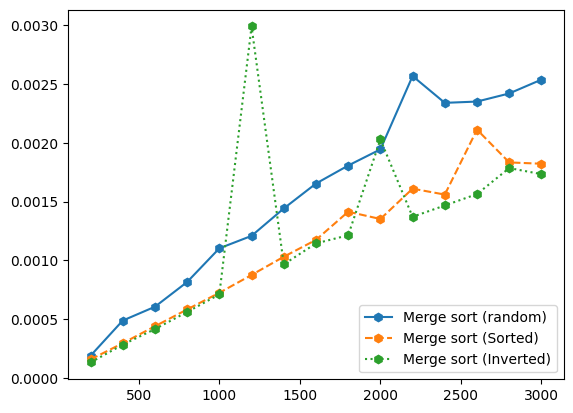

In [65]:
executerTri(merge_sort_bu, 'h', 'Merge sort') 

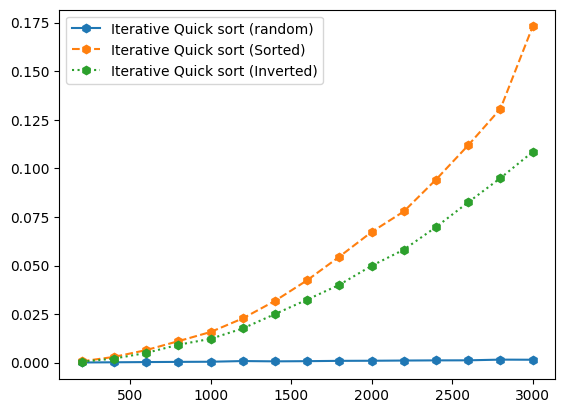

In [64]:
executerTri(quick_sort_it, 'h', 'Iterative Quick sort')

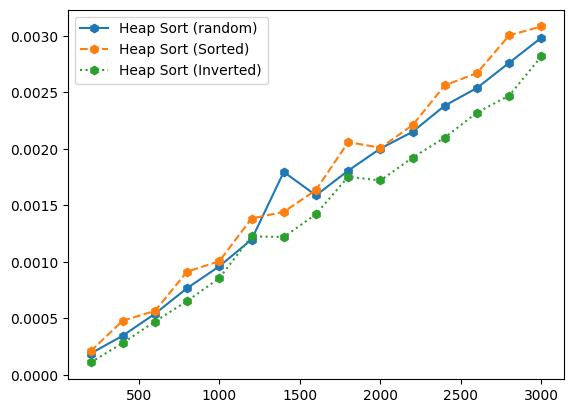

In [39]:
executerTri(heap_sort, 'h', 'Heap Sort')

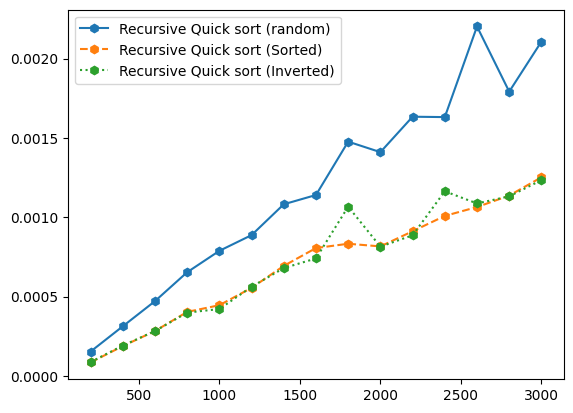

In [63]:
executerTri(quick_sort_rec, 'h', 'Recursive Quick sort', 15, 200, False)

In [28]:
from multiprocessing.pool import ThreadPool

def square(x):
    return x**2

numbers = [1, 2, 3, 4, 5]

with ThreadPool() as pool:
    squares = pool.map(square, numbers)

print(squares)


[1, 4, 9, 16, 25]
